In [8]:
import os 
print(os.getcwd())


/home/mili/Documentos/Famaf/tercer_año/redes/laboratorio/redes23lab3g01/src


In [9]:
ls


General.anf        Makefile*     out/         results/
Generator.cc*      network.ned*  Queue.cc*    Sink.cc*
lab3-kickstarter*  omnetpp.ini*  redes.ipynb


In [10]:
#Configuracion inicial
%matplotlib inline
import matplotlib.pyplot as plt #librería para graficas de python
import numpy # extiende las librerias de matemática de python
import pandas as pd #libreria para procesamiento de datos muy usada en la industria
import seaborn # Extiende las funcionalidades de matplotlib, muy usado en data visualization
import csv 

str_filename = 'results/prueba3.csv'

fh = open(str_filename)

data = pd.read_csv(str_filename)

data


,run,type,module,name,attrname,attrvalue,vectime,vecvalue
0,General-0-20230505-10:44:13-69800,vector,Network.nodeTx.gen,packetGen,NaN,NaN,0.007958745046 0.016944348931 0.029503656511 0...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
1,General-0-20230505-10:44:13-69800,vector,Network.nodeTx.queue,bufferSize,NaN,NaN,0.007958745046 0.016944348931 0.029503656511 0...,1 1 2 3 4 5 6 7 7 8 9 10 11 12 13 14 15 16 17 ...
2,General-0-20230505-10:44:13-69800,vector,Network.queue,bufferSize,NaN,NaN,0.108058745046 0.208058745046 0.308058745046 0...,1 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9 10 10 11...
3,General-0-20230505-10:44:13-69800,vector,Network.nodeRx.queue,bufferSize,NaN,NaN,0.308158745046 0.508158745046 0.708158745046 0...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
4,General-0-20230505-10:44:13-69800,vector,Network.nodeRx.sink,Delay,NaN,NaN,0.408158745046 0.608158745046 0.808158745046 1...,0.4002 0.591214396115 0.778655088535 0.9600590...
5,General-0-20230505-10:44:13-69800,vector,Network.queue,packetDropVector,NaN,NaN,40.208058745046 40.408058745046 40.60805874504...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...


In [15]:
#Omnet guarda los valores de nuestro "vector" (lista de valores) en una celda, por lo que tengo que extraer estos valores

print(len(time_gen))
print(len(buffer_gen))

time_gen = data['vectime'].loc[[1]].tolist()

buffer_gen = data['vecvalue'].loc[[1]].tolist()

time_queue = data['vectime'].loc[[2]].tolist()
buffer_queue = data['vecvalue'].loc[[2]].tolist()

time_sink = data['vectime'].loc[[3]].tolist()
buffer_sink = data['vecvalue'].loc[[3]].tolist()

# Los valores que sacamos estan como un solostring separados por comas por lo que tengo que convertirlos a listas para poder graficarlos
time_gen = list(map(float,time_gen[0].split()))
time_queue = list(map(float,time_queue[0].split()))
time_sink = list(map(float,time_sink[0].split()))
buffer_gen = list(map(float,buffer_gen[0].split()))
buffer_queue = list(map(float,buffer_queue[0].split()))
buffer_sink = list(map(float,buffer_sink[0].split()))

print(len(time_gen))
print(len(buffer_gen))
print(len(time_queue))
print(len(buffer_queue))
print(len(time_sink))
print(len(buffer_sink))

4187
12982
4187
12982
1200
1200
999
999


1.0
1.0


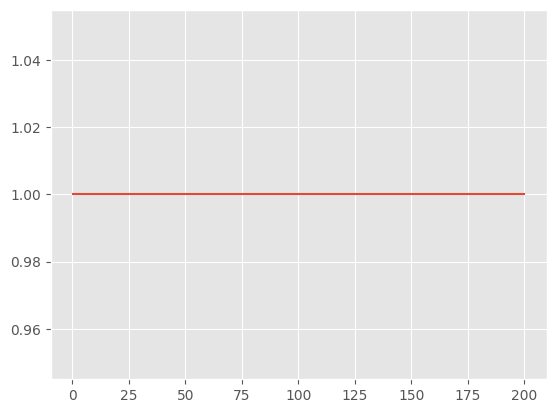

In [12]:
fig, ax = plt.subplots() #creo una figura y divido en pares para dibujar
plt.style.use("ggplot") #aplico un estilo de graficos
#plt.style.available -> para ver estilos posibles
ax.plot(time_sink,buffer_sink)
print(max(buffer_sink))
print(min(buffer_sink))

<function matplotlib.pyplot.show(close=None, block=None)>

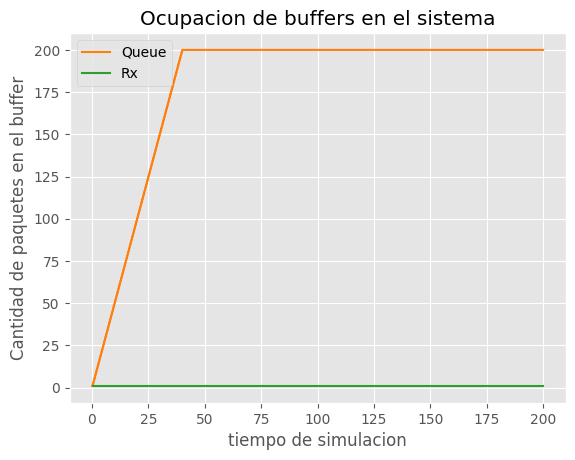

In [13]:
fig, ax1 = plt.subplots()
#plt.plot(time_gen,buffer_gen, color='tab:blue', label="Tx")
plt.plot(time_queue,buffer_queue, color='tab:orange', label="Queue")
plt.plot(time_sink,buffer_sink, color='tab:green', label="Rx")
plt.title('Ocupacion de buffers en el sistema')
plt.xlabel("tiempo de simulacion")
plt.ylabel("Cantidad de paquetes en el buffer")
plt.legend()
plt.show